![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`
### `Alumnos: Lázaro Sánchez Ricardo Alezander`
### `         Marines Vega Piero Alexander`
### `         Rodriguez Morales Joseph Daniel`
```
Laboratorio 3: Implementación de Convolución y Correlación
```


## **Laboratorio 3: Implementación de la convolución discreta**

###**3.1. Importación de Librerías**

* **Librerias a utilizar:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import time
from scipy.signal import gaussian
import soundfile as sf
from IPython import display
from google.colab import files
plt.style.use(['dark_background'])

###**3.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [ ]:
# Leer el archivo de audio WAV
archivo_audio = "/Grabación (1).wav"
senal,tasa_muestreo = sf.read(archivo_audio)

fm = tasa_muestreo
t = np.arange(0, len(senal)) /fm
n = len(t)
amp = senal

# Crear un kernel gaussiano de 31 muestras con desviación estándar de 3

tamanio_kernel = 31
desviacion_estandar = 3
kernel = gaussian(tamanio_kernel, std=desviacion_estandar)
senal1=senal
senal2=senal
# Normalizar el kernel para que la suma de las muestras sea 1
kernel /= np.sum(kernel)

N=len(senal1)
M=len(senal2)



<ipython-input-2-7edef0eb0898>:14: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  kernel = gaussian(tamanio_kernel, std=desviacion_estandar)


* **Mostrando señales creadas**

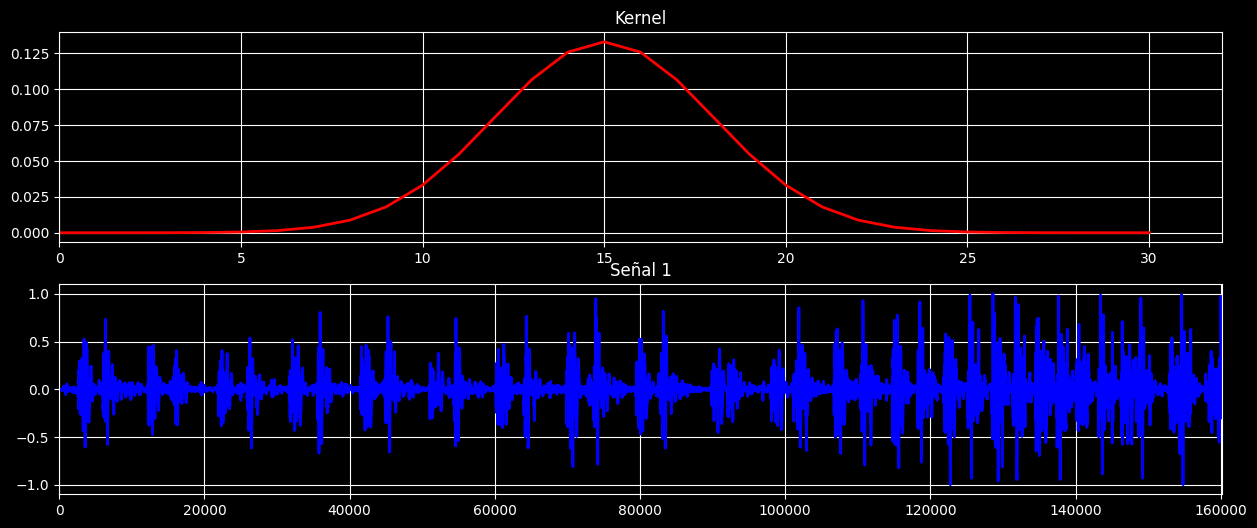

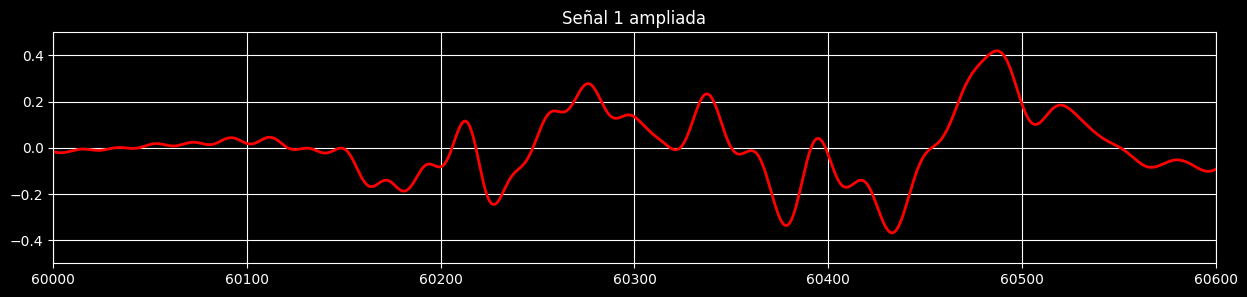

In [ ]:
plt.figure(figsize=(15,6))

#Grafica de Kernel
plt.subplot(211)
plt.plot(kernel,'r',linewidth=2)
plt.xlim([0,32])
plt.title('Kernel')
plt.grid()

#Gráfica de la señal
plt.subplot(212)
plt.plot(senal1,'b',linewidth=2)
plt.xlim([0,N])
plt.title('Señal 1')
plt.grid()
plt.show()

#Gráfica de la señal Ajustada:
plt.figure(figsize=(15,3))
plt.plot(senal1,'r',linewidth=2)
plt.xlim([0,N]) #Limitamos el eje X entre 0 y N
plt.title('Señal 1 ampliada')
plt.grid()
plt.axis([60000, 60600,-0.5 ,0.5])
plt.show()


 * **Cálculo y gráfica de la convolución**

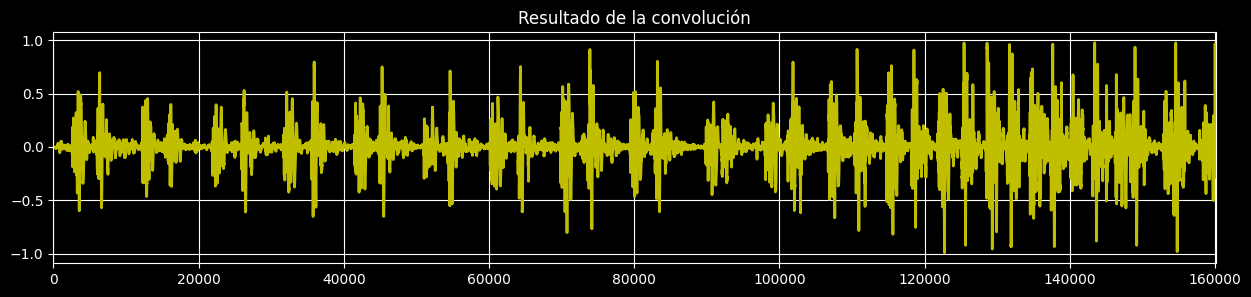

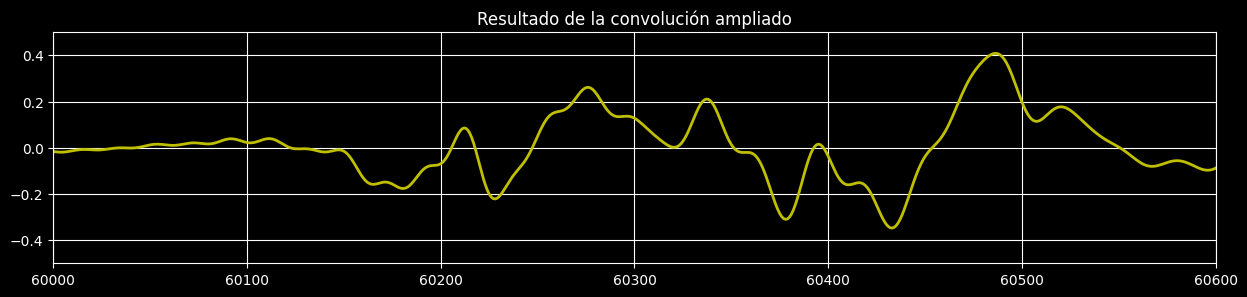

mv: 'convolucion.wav' and '/content/convolucion.wav' are the same file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

result=np.convolve(senal1,kernel,'same') #'same' indica que el resultado debe ser recortado y tener
                                            #las mismas dimensiones que la señal de entrada. Si se desea
                                            #el resultado completo se puede usar 'full' y no limitar eje x
plt.figure(figsize=(15,3))
plt.plot(result,'y',linewidth=2)
plt.xlim([0,len(result)])
plt.title('Resultado de la convolución')
plt.grid()
plt.show()

#Gráfica del resultado de la convolución Ajustado:
plt.figure(figsize=(15,3))
plt.plot(result,'y',linewidth=2)
plt.xlim([0,N]) #Limitamos el eje X entre 0 y N
plt.title('Resultado de la convolución ampliado')
plt.grid()
plt.axis([60000, 60600,-0.5 ,0.5])
plt.show()

# Guardar la señal convolucionada en un archivo temporal
nombre_archivo_reducido = 'convolucion.wav'
sf.write(nombre_archivo_reducido, result, tasa_muestreo)

# Mover el archivo al sistema de archivos temporal de Colab
ruta_temporal = '/content/' + nombre_archivo_reducido
!mv $nombre_archivo_reducido $ruta_temporal

# Descargar el archivo reducido
files.download(ruta_temporal)


###**3.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [ ]:
#Número deseado de muestras después del downsampling
numero_muestras_deseado = 200

# Calcular el factor de downsampling
factor_downsampling = len(senal1) // numero_muestras_deseado

# Reducir el número de muestras utilizando slicing
audio_reducido = senal1[::factor_downsampling]

senal1=audio_reducido

# Nueva tasa de muestreo después del downsampling
nueva_tasa_muestreo = tasa_muestreo // factor_downsampling

#Tamaño de la convolución
nSenal1=len(senal1)
nKernel=len(kernel)
nConvolucion=nSenal1+nKernel-1

#Aplicación de la convolución
resultado=np.convolve(senal1,kernel,'full')


* **Graficando resultados**

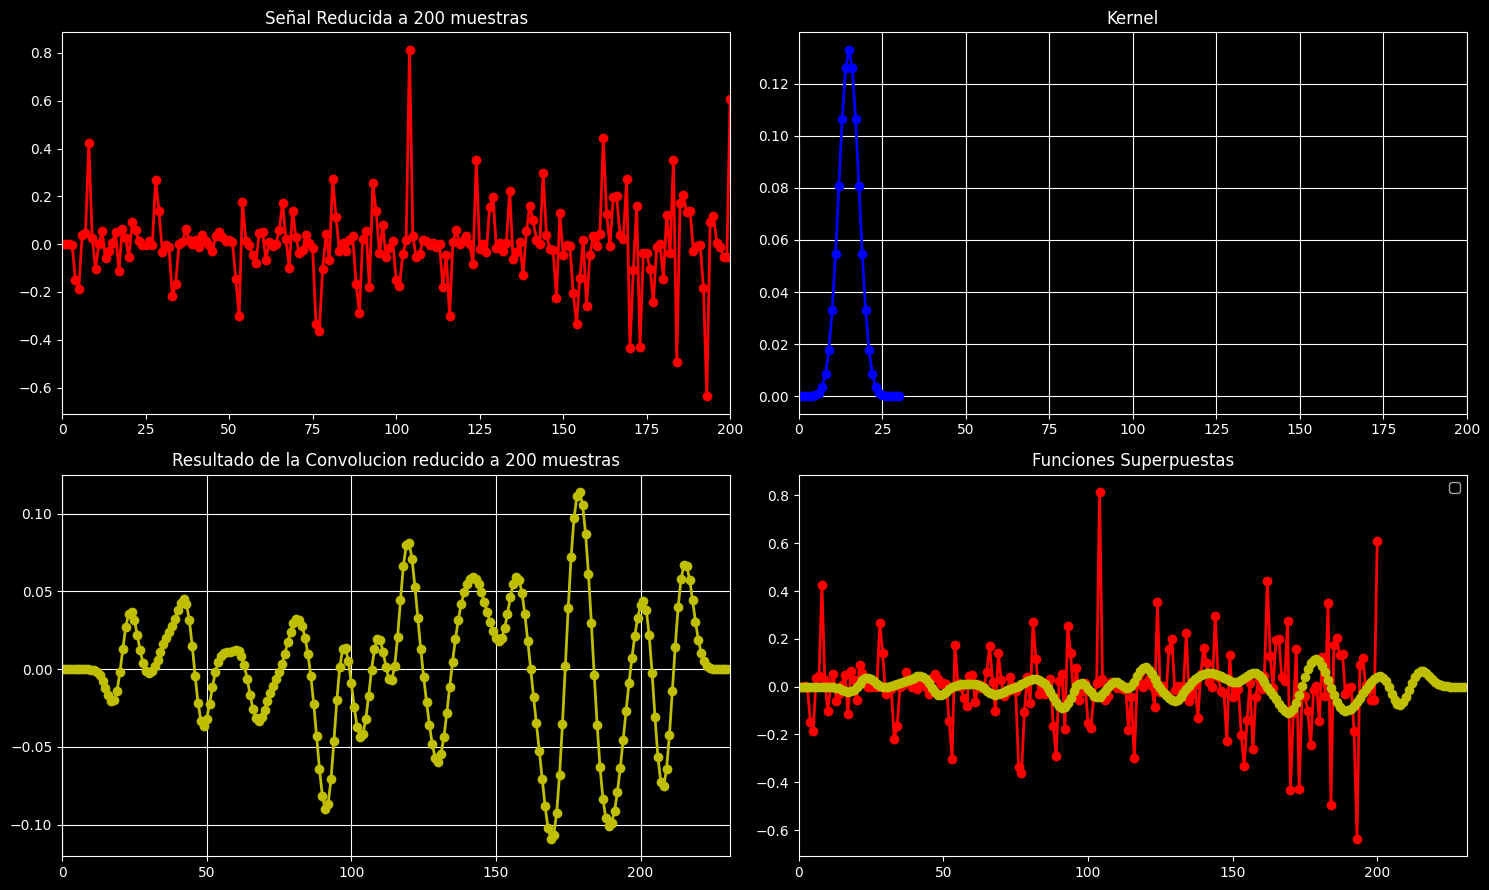

In [ ]:



plt.figure(figsize=(15,9))

#Gráfica de la señal
plt.subplot(2,2,1)
plt.plot(senal1,'ro-',linewidth=2)
plt.xlim([0,nSenal1-1])
plt.title('Señal Reducida a 200 muestras')
plt.grid

#Gráfica del kernel
plt.subplot(2,2,2)
plt.plot(kernel,'bo-',linewidth=2)
plt.xlim([0,nSenal1-1])
plt.title('Kernel')
plt.grid()

#Gráfica de los resultados
plt.subplot(2,2,3)
plt.plot(resultado,'yo-',linewidth=2)
plt.xlim([0,nConvolucion])
plt.title('Resultado de la Convolucion reducido a 200 muestras')
plt.grid()

#Gráfica de comparación de señal original y convolucionada
plt.subplot(2, 2, 4)
plt.plot(senal1,'ro-',linewidth=2)
plt.xlim([0,nSenal1-1])
plt.plot(resultado,'yo-',linewidth=2)
plt.xlim([0,nConvolucion])
plt.legend()  # Mostrar leyenda para las funciones superpuestas
plt.title('Funciones Superpuestas')

plt.tight_layout()


plt.show()


###**3.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

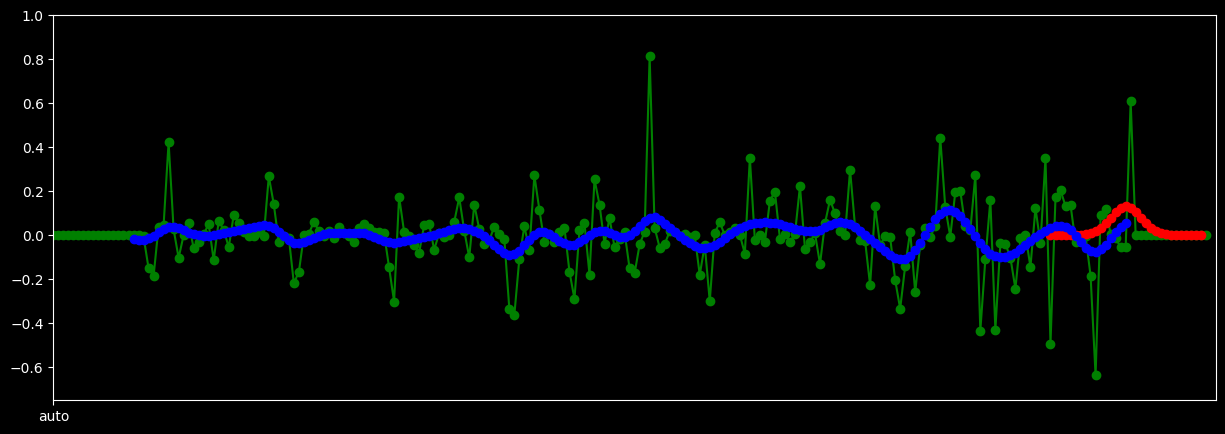

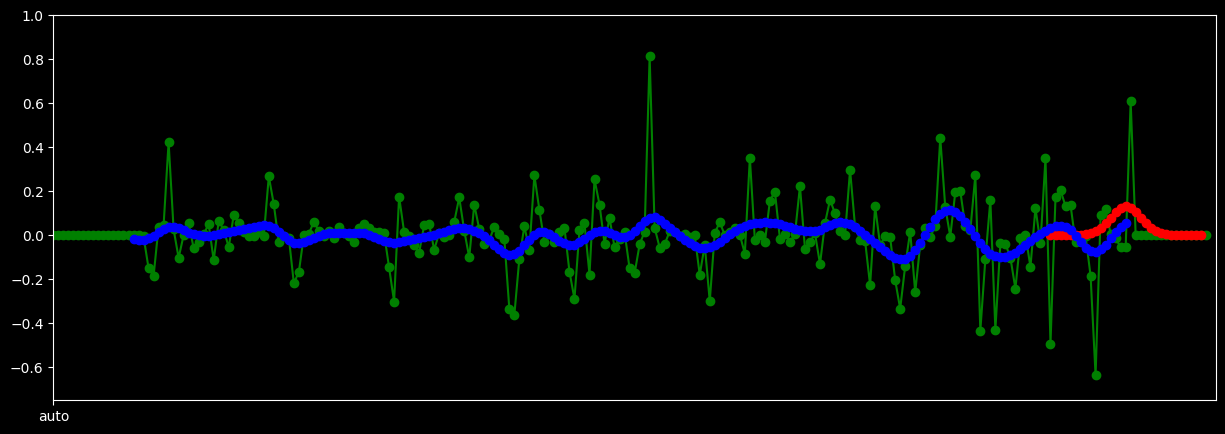

In [ ]:
#Calculamos la mitad del kernel
mitad_kernel=int(np.floor(nKernel/2)) #Redondeo hacia abajo

#Invertimos el kernel
kernel_invertido=kernel[::-1]

#Rellenando la señal con 0's para almacenar la salida
senal1_pad=np.concatenate((np.zeros(mitad_kernel),senal1,np.zeros(mitad_kernel)),axis=0)

#Vector para almacenar el resultado
conv_resultado=np.zeros(nConvolucion)

#Correr la convolución
plt.figure(figsize=(15,5))

for ti in range(mitad_kernel,nConvolucion-mitad_kernel):

  #Extrayendo una ventana del tamaño del kernel
  ventana=senal1_pad[ti-mitad_kernel:ti+mitad_kernel+1]
  #Producto punto de la ventana con el kernel invertido
  conv_resultado[ti]=np.sum(ventana*kernel_invertido)

  #Graficando
  plt.cla() #Limpiando los ejes
  plt.axis(['auto','auto',-0.75,1])
  plt.plot(senal1_pad,'go-') #muestra la señal original
  plt.plot(np.arange(ti-mitad_kernel-1,ti+mitad_kernel),kernel_invertido,'ro-') #Muestra el movimiento del kernel
  plt.plot(np.arange(mitad_kernel+1,ti),conv_resultado[mitad_kernel+1:ti],'bo-') #Muestra el resultado
  plt.xlim([0,nConvolucion+1]) #Rango del eje x

  display.clear_output(wait=True) #Limpia la salida de la celda
  display.display(plt.gcf())#Selecciona la gráfica actual donde volverá a graficar

  time.sleep(0.5)



#recortando los ejes
conv_resultado=conv_resultado[mitad_kernel:-mitad_kernel]

###**3.4. Comparación entre señales**

*Se usarán las señales creadas en el apartado anterior*

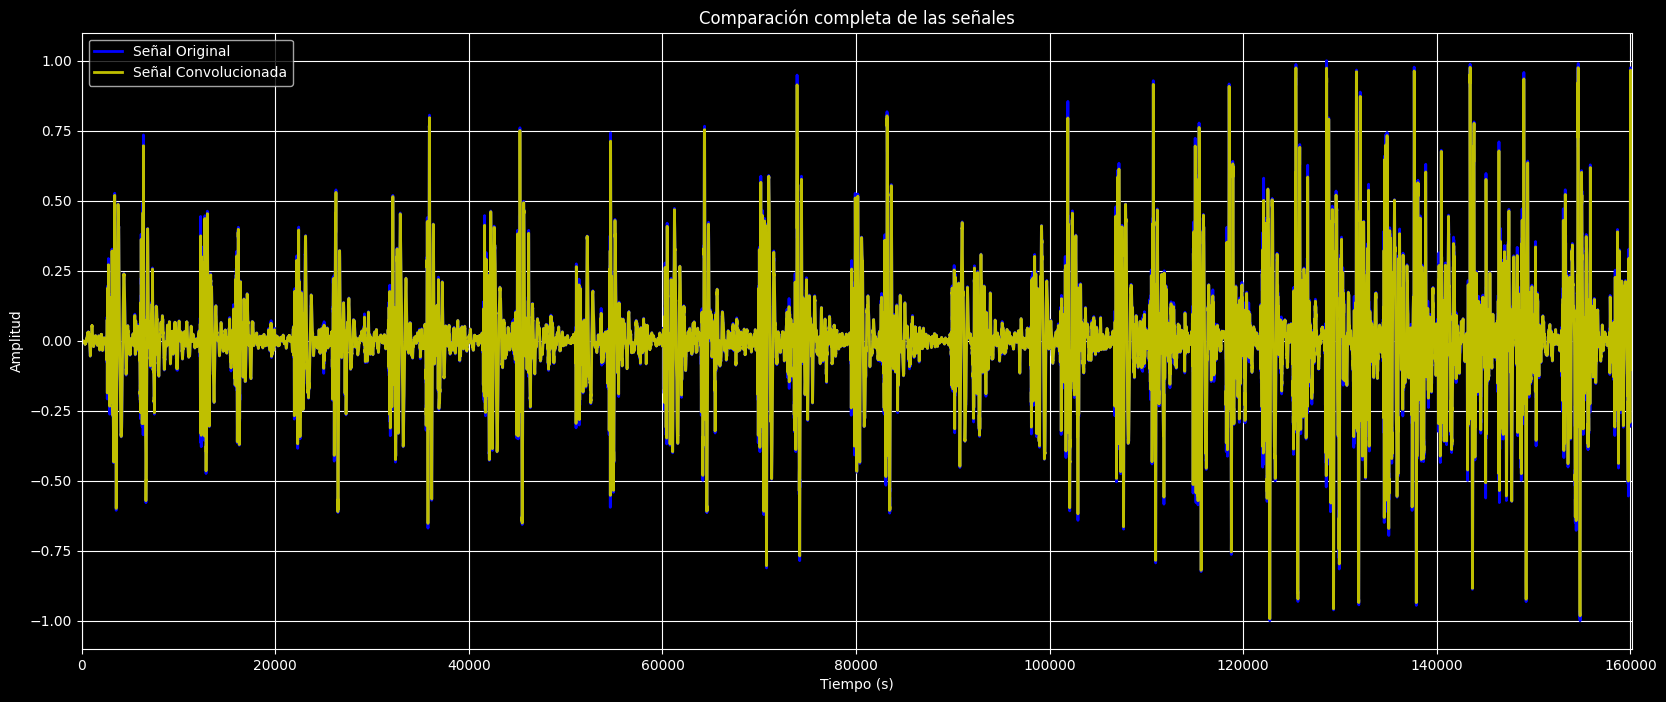

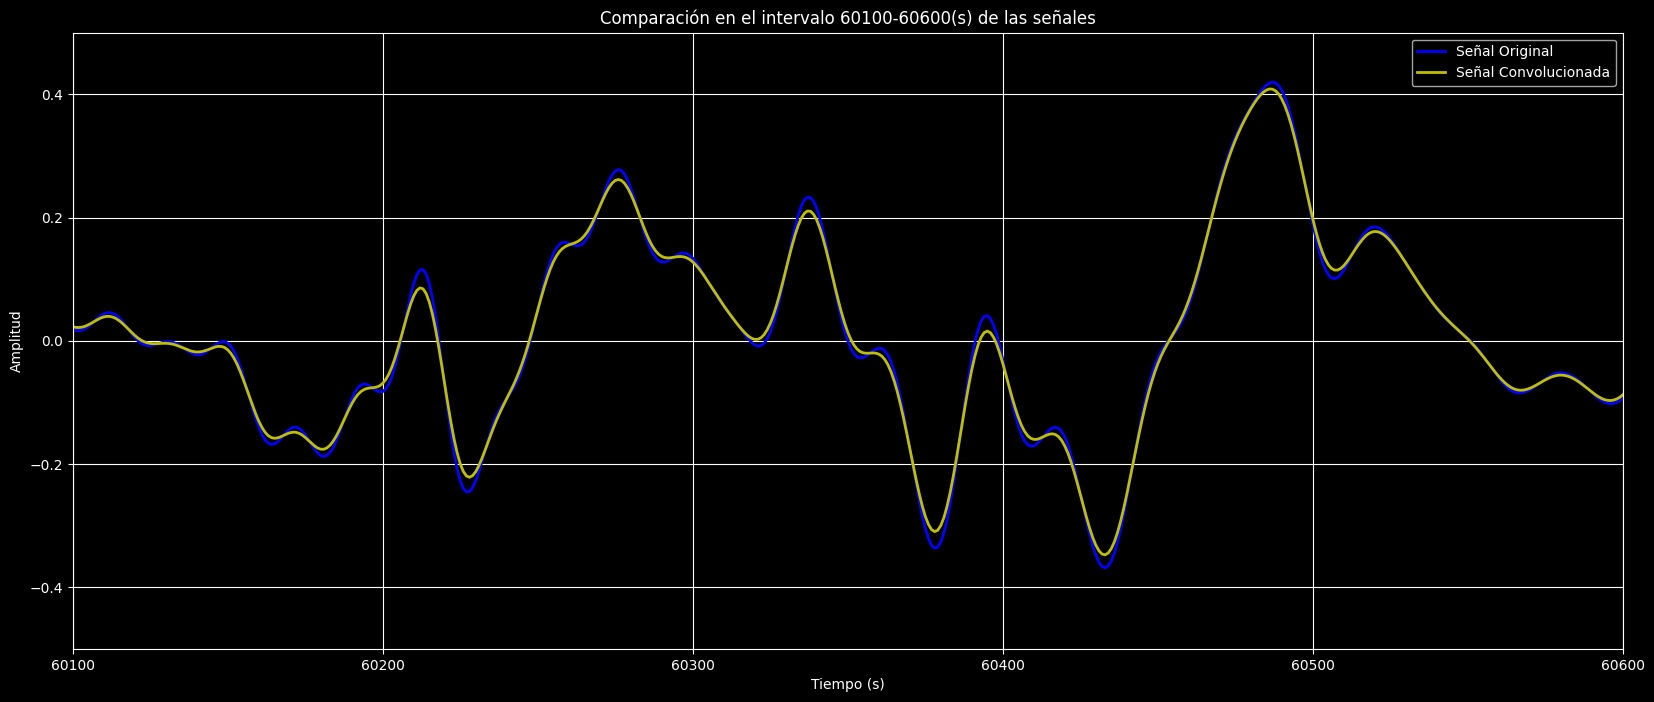

In [ ]:
plt.subplots(figsize=(20,8))

plt.plot(amp,'b' ,linewidth=2, label= 'Señal Original')
plt.xlim([0,len(result)])
plt.plot(result,'y',linewidth=2, label='Señal Convolucionada')
plt.xlim([0,len(result)])
plt.title('Comparación completa de las señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.show()

plt.subplots(figsize=(20,8))

plt.plot(amp,'b' ,linewidth=2, label= 'Señal Original')
plt.xlim([0,len(result)])
plt.plot(result,'y',linewidth=2, label='Señal Convolucionada')
plt.xlim([0,len(result)])
plt.title('Comparación en el intervalo 60100-60600(s) de las señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.axis([60100, 60600,-0.5 ,0.5])
plt.legend()

plt.show()

## **¿Qué efecto sonoro identifica entre el audio original y el modificado?** ##

### Al utilizar un kernel de tipo gaussiano con 31 muestras una desviación estandar de 3, podemos encontrar que con respecto a la señal original, la calidad del ruido fue considerablemente reducida, puesto que tal cual se pudo apreciar tanto en la gráfica de comparación y la animación de la convolución, la señal resultante presenta una reducción en los picos con respecto a la original, produciendo así un suavizado y disminución del ruido. ###

###**3.5. Cambio de Convolución por Correlación**


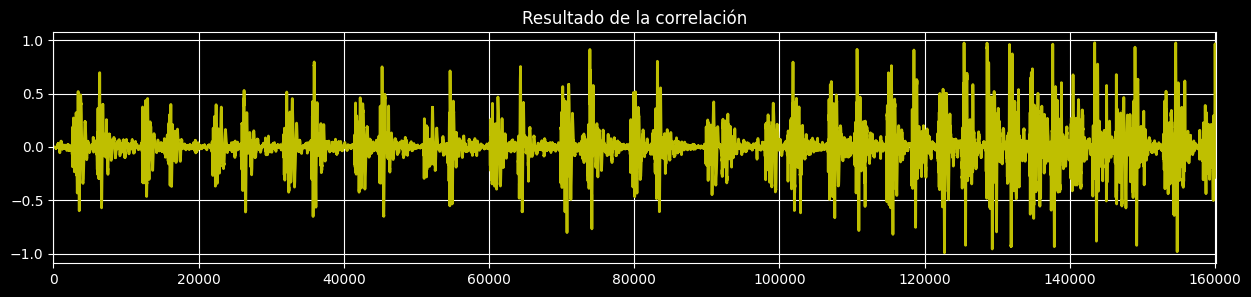

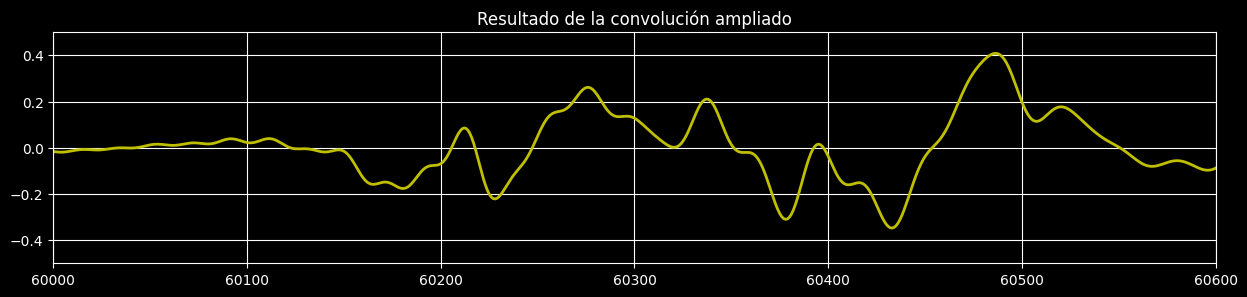

mv: 'correlación.wav' and '/content/correlación.wav' are the same file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
result2=np.correlate(senal2,kernel,'same') #'same' indica que el resultado debe ser recortado y tener
                                            #las mismas dimensiones que la señal de entrada. Si se desea
                                            #el resultado completo se puede usar 'full' y no limitar eje x
plt.figure(figsize=(15,3))
plt.plot(result2,'y',linewidth=2)
plt.xlim([0,len(result2)])
plt.title('Resultado de la correlación')
plt.grid()
plt.show()

#Gráfica del resultado de la convolución Ajustado:
plt.figure(figsize=(15,3))
plt.plot(result2,'y',linewidth=2)
plt.xlim([0,M]) #Limitamos el eje X entre 0 y M
plt.title('Resultado de la convolución ampliado')
plt.grid()
plt.axis([60000, 60600,-0.5 ,0.5])
plt.show()

# Guardar la señal convolucionada en un archivo temporal
nombre_archivo_reducido2 = 'correlación.wav'
sf.write(nombre_archivo_reducido2, result2, tasa_muestreo)

# Mover el archivo al sistema de archivos temporal de Colab
ruta_temporal = '/content/' + nombre_archivo_reducido2
!mv $nombre_archivo_reducido2 $ruta_temporal

# Descargar el archivo reducido
files.download(ruta_temporal)

#_____________________________#

#Número deseado de muestras después del downsampling
numero_muestras_deseado = 200

# Calcular el factor de downsampling
factor_downsampling = len(senal2) // numero_muestras_deseado

# Reducir el número de muestras utilizando slicing
audio_reducido = senal2[::factor_downsampling]

senal2=audio_reducido

# Nueva tasa de muestreo después del downsampling
nueva_tasa_muestreo = tasa_muestreo // factor_downsampling

#Tamaño de la correlación
nSenal2=len(senal2)
nKernel=len(kernel)
nCorrelate=nSenal2+nKernel-1

#Aplicación de la correlación
resultado=np.correlate(senal2,kernel,'full')


* **Graficando resultados**

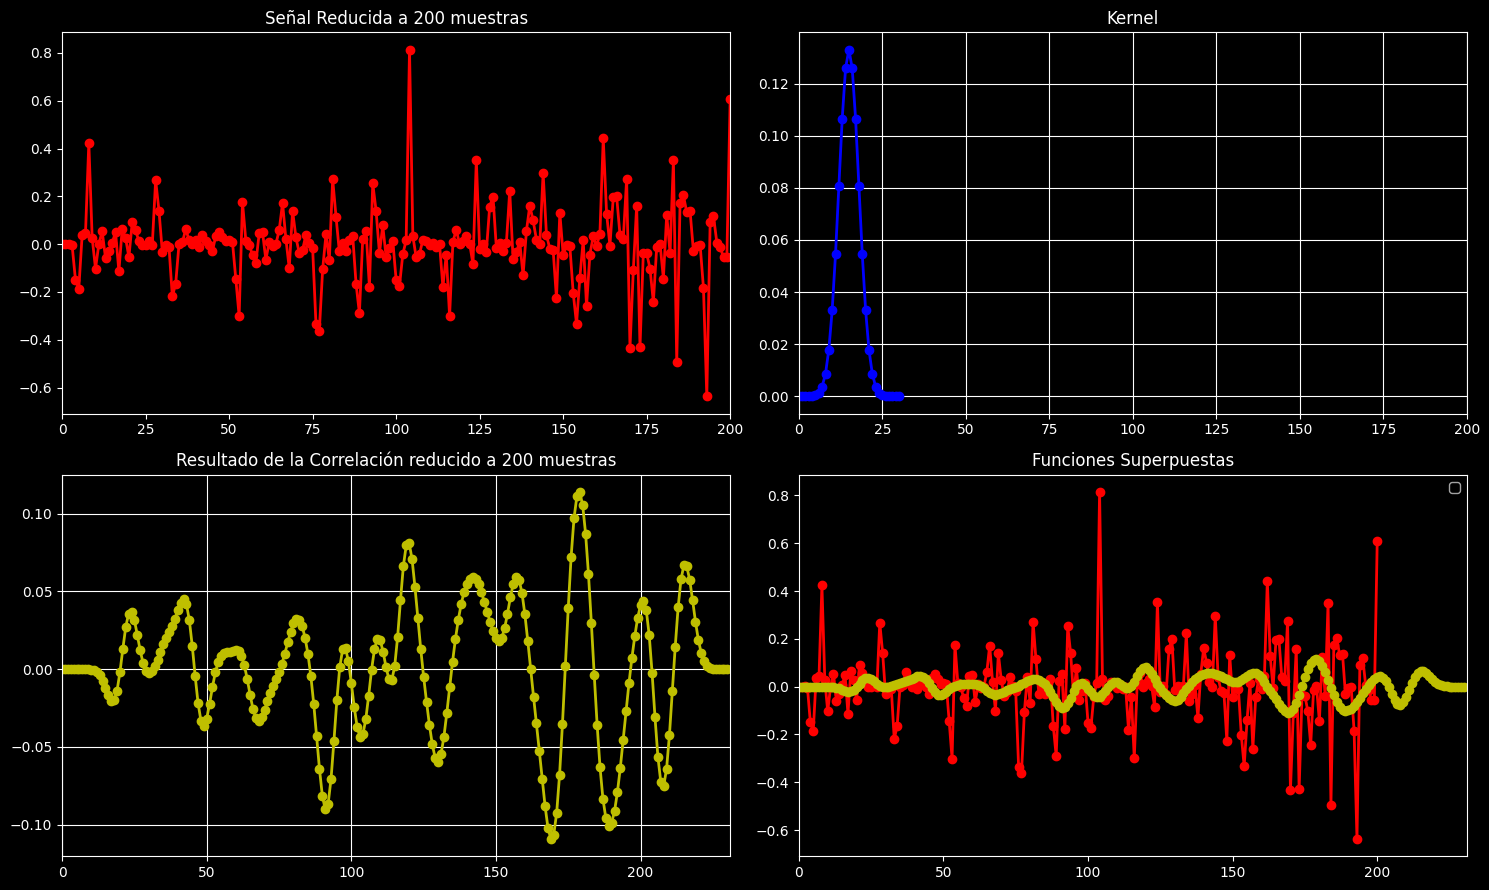

In [ ]:

plt.figure(figsize=(15,9))

#Gráfica de la señal
plt.subplot(2,2,1)
plt.plot(senal2,'ro-',linewidth=2)
plt.xlim([0,nSenal2-1])
plt.title('Señal Reducida a 200 muestras')
plt.grid

#Gráfica del kernel
plt.subplot(2,2,2)
plt.plot(kernel,'bo-',linewidth=2)
plt.xlim([0,nSenal2-1])
plt.title('Kernel')
plt.grid()

#Gráfica de los resultados
plt.subplot(2,2,3)
plt.plot(resultado,'yo-',linewidth=2)
plt.xlim([0,nCorrelate])
plt.title('Resultado de la Correlación reducido a 200 muestras')
plt.grid()

#Gráfica de comparación de señal original y correlacionada
plt.subplot(2, 2, 4)
plt.plot(senal2,'ro-',linewidth=2)
plt.xlim([0,nSenal2-1])
plt.plot(resultado,'yo-',linewidth=2)
plt.xlim([0,nCorrelate])
plt.legend()  # Mostrar leyenda para las funciones superpuestas
plt.title('Funciones Superpuestas')

plt.tight_layout()

* **Animación de la correlación**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

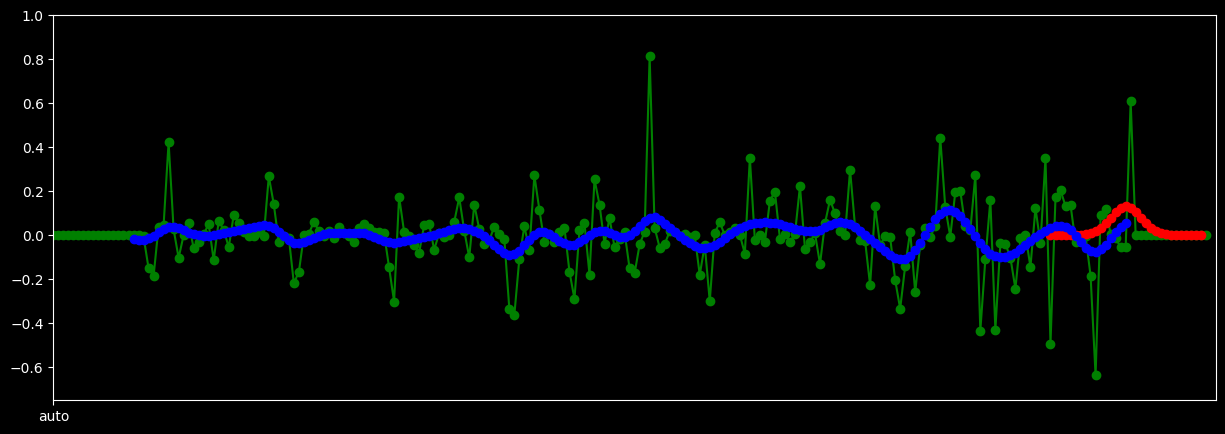

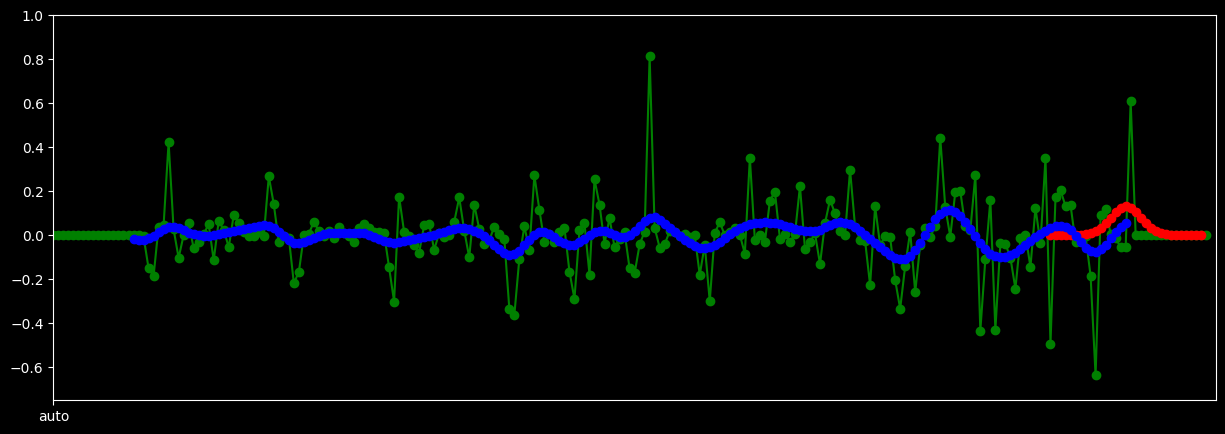

In [ ]:
#Calculamos la mitad del kernel
mitad_kernel=int(np.floor(nKernel/2)) #Redondeo hacia abajo

#Invertimos el kernel
kernel_invertido=kernel[::-1]

#Rellenando la señal con 0's para almacenar la salida
senal2_pad=np.concatenate((np.zeros(mitad_kernel),senal2,np.zeros(mitad_kernel)),axis=0)

#Vector para almacenar el resultado
correl_resultado=np.zeros(nCorrelate)

#Correr la convolución
plt.figure(figsize=(15,5))

for ti in range(mitad_kernel,nCorrelate-mitad_kernel):

  #Extrayendo una ventana del tamaño del kernel
  ventana=senal2_pad[ti-mitad_kernel:ti+mitad_kernel+1]
  #Producto punto de la ventana con el kernel invertido
  correl_resultado[ti]=np.sum(ventana*kernel_invertido)

  #Graficando
  plt.cla() #Limpiando los ejes
  plt.axis(['auto','auto',-0.75,1])
  plt.plot(senal2_pad,'go-') #muestra la señal original
  plt.plot(np.arange(ti-mitad_kernel-1,ti+mitad_kernel),kernel_invertido,'ro-') #Muestra el movimiento del kernel
  plt.plot(np.arange(mitad_kernel+1,ti),correl_resultado[mitad_kernel+1:ti],'bo-') #Muestra el resultado
  plt.xlim([0,nCorrelate+1]) #Rango del eje x

  display.clear_output(wait=True) #Limpia la salida de la celda
  display.display(plt.gcf())#Selecciona la gráfica actual donde volverá a graficar

  time.sleep(0.5)



#recortando los ejes
correl_resultado=correl_resultado[mitad_kernel:-mitad_kernel]

* **Comparación entre señales**



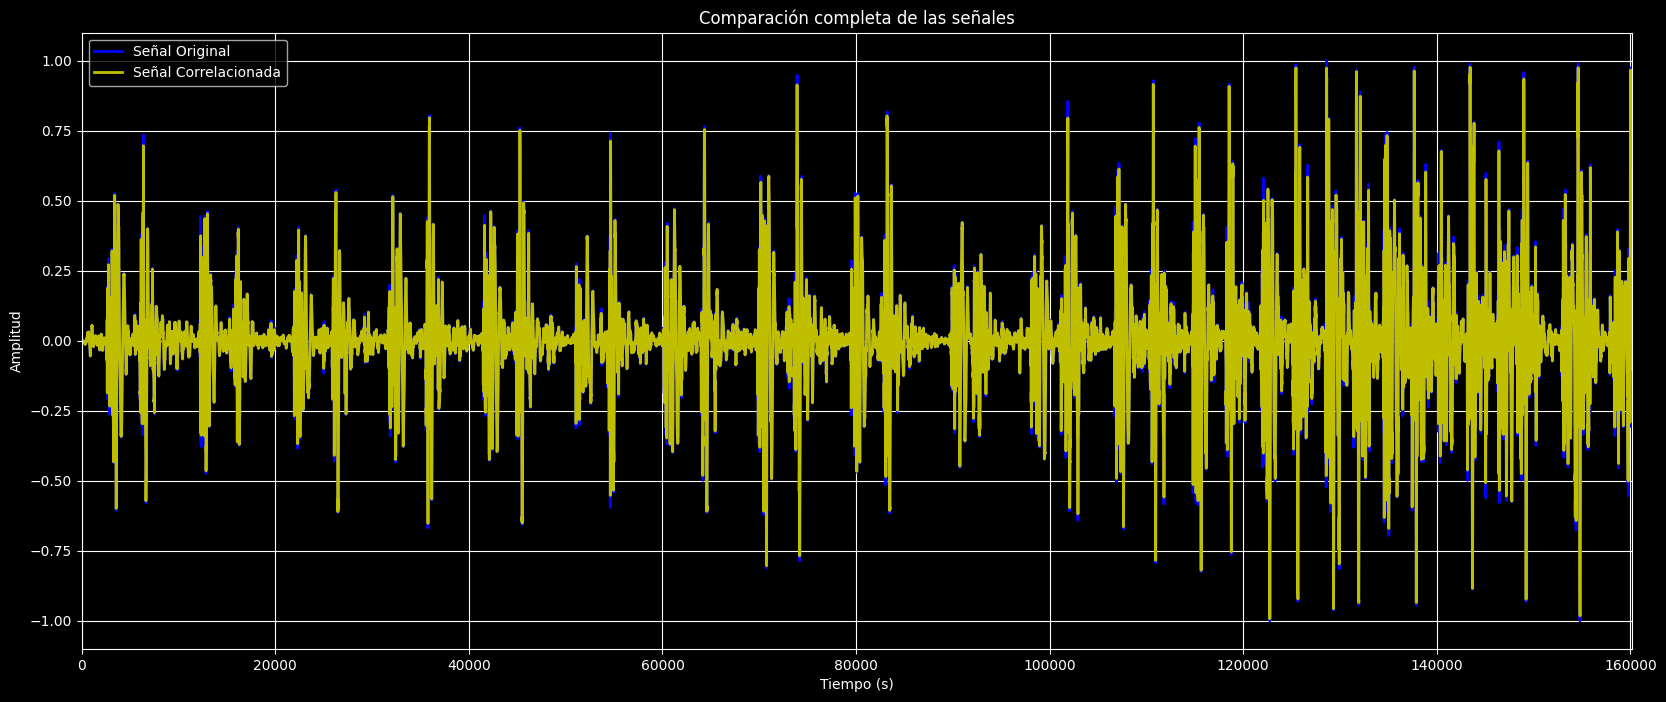

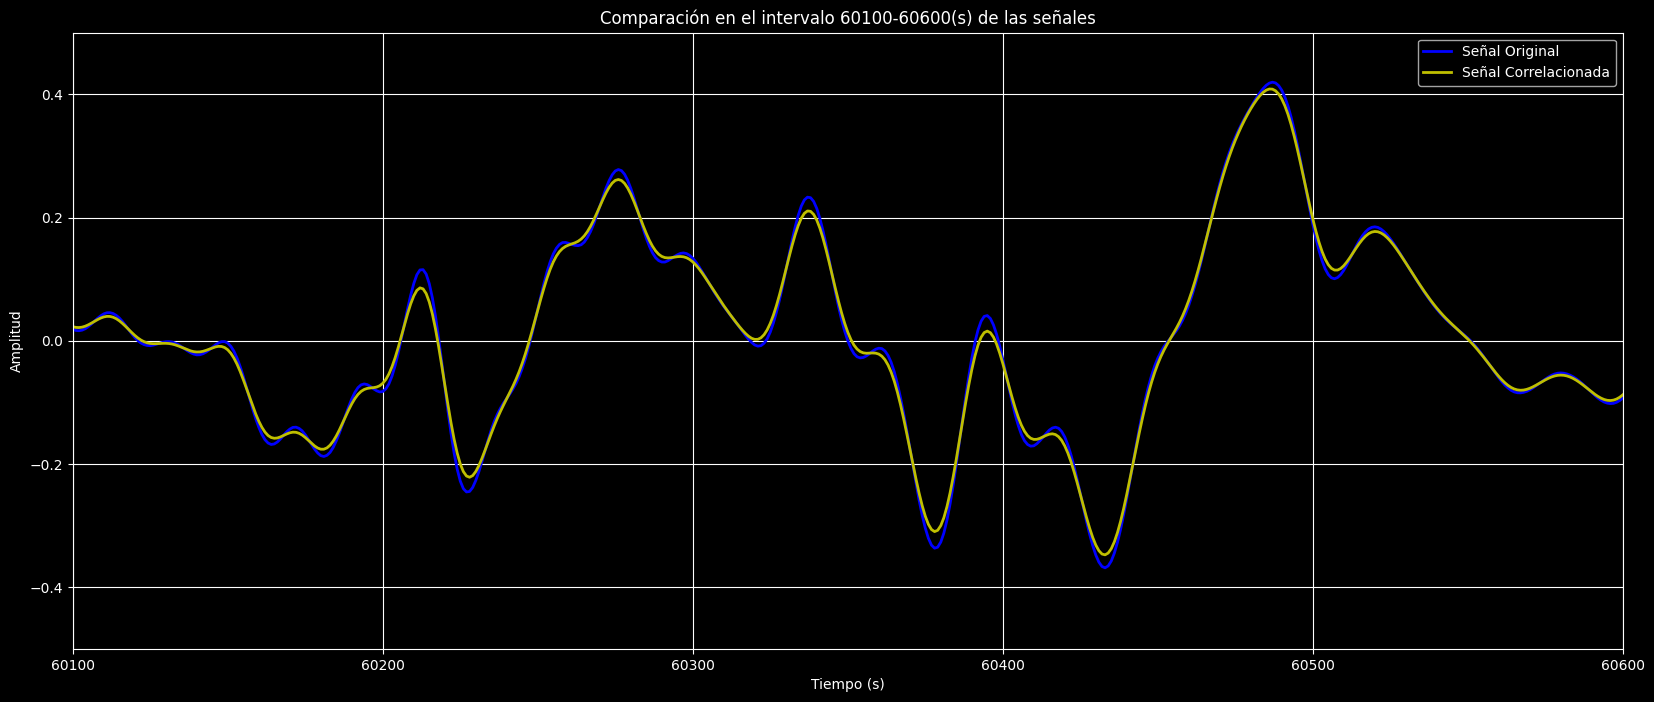

In [ ]:
plt.subplots(figsize=(20,8))

plt.plot(amp,'b' ,linewidth=2, label= 'Señal Original')
plt.xlim([0,len(result2)])
plt.plot(result2,'y',linewidth=2, label='Señal Correlacionada')
plt.title('Comparación completa de las señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.show()

plt.subplots(figsize=(20,8))

plt.plot(amp,'b' ,linewidth=2, label= 'Señal Original')
plt.xlim([0,len(result2)])
plt.plot(result2,'y',linewidth=2, label='Señal Correlacionada')
plt.xlim([0,len(result2)])
plt.title('Comparación en el intervalo 60100-60600(s) de las señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.axis([60100, 60600,-0.5 ,0.5])
plt.legend()

plt.show()

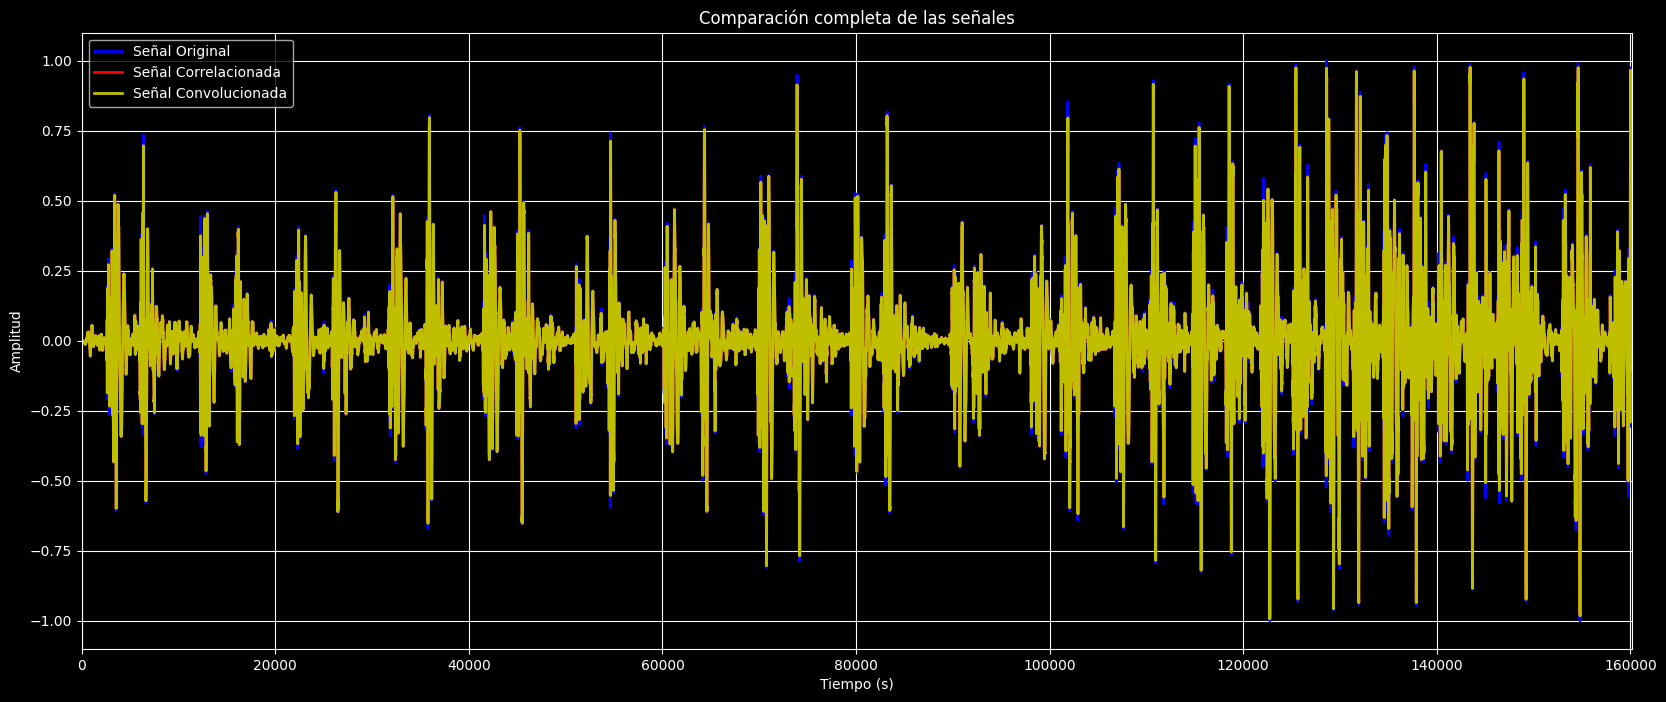

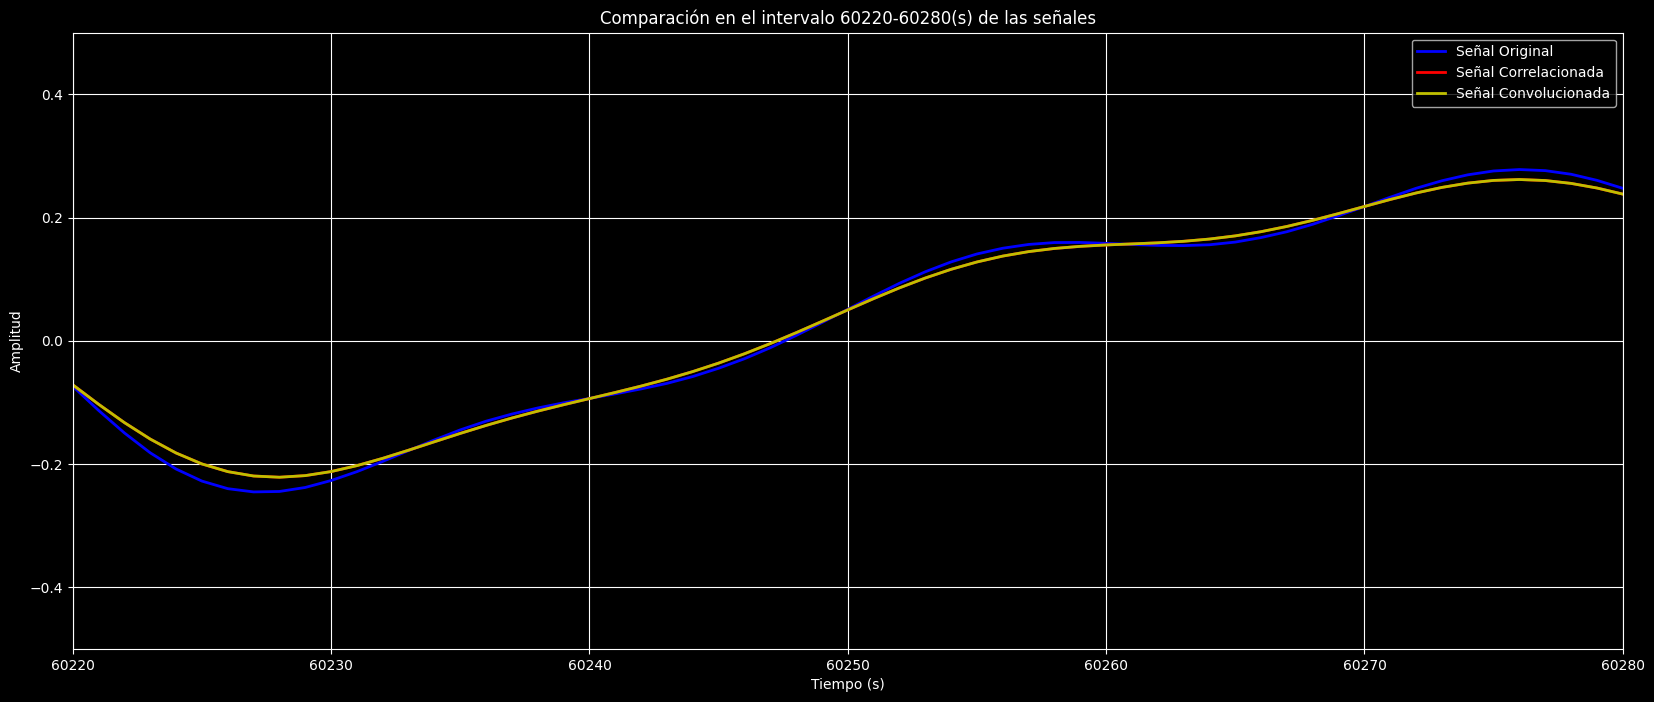

In [ ]:
plt.subplots(figsize=(20,8))

plt.plot(amp,'b' ,linewidth=2, label= 'Señal Original')
plt.xlim([0,len(result2)])
plt.plot(result2,'r',linewidth=2, label='Señal Correlacionada')
plt.plot(result,'y',linewidth=2, label='Señal Convolucionada')
plt.title('Comparación completa de las señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.show()

plt.subplots(figsize=(20,8))

plt.plot(amp,'b' ,linewidth=2, label= 'Señal Original')
plt.xlim([0,len(result2)])
plt.plot(result2,'r',linewidth=2, label='Señal Correlacionada')
plt.xlim([0,len(result2)])
plt.plot(result,'y',linewidth=2, label='Señal Convolucionada')
plt.xlim([0,len(result)])
plt.title('Comparación en el intervalo 60220-60280(s) de las señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.axis([60220, 60280,-0.5 ,0.5])
plt.legend()

plt.show()

##**¿Si en el ejercicio 5a usa la función correlate en vez de convolve que diferencias en la forma y sonoras se tendría en la señal de salida?. Explique.**##

###Las gráficas de Convolución y Correlación, son similares, no habiendo una variación observable. El audio de igual manera es similar, no habiendo diferencia en cuanto al la calidad sonora.Además al extraer ambos archivos de resultados estos tienen el mismo peso, por lo tanto concluimos que no hay diferencia en el uso de la función correlate o convolve para nuestro caso de estudio. Esto se puede explicar de la siguiente manera:###
###Si en el ejercicio usas la función correlate en lugar de convolve para realizar la operación de correlación en la señal de entrada con el kernel, habrá diferencias tanto en la forma como en las características sonoras de la señal de salida. Aquí están las diferencias clave: ###
### **Diferencia en la operación matemática:** ###
###convolve: La convolución de una señal con un kernel da como resultado una señal que representa cómo el kernel "responde" a diferentes partes de la señal de entrada. Puede considerarse una especie de filtro.
###correlate: La correlación calcula la similitud entre la señal de entrada y el kernel, sin invertir el kernel. La correlación puede dar como resultado valores negativos y positivos y muestra cómo la señal de entrada se parece o se relaciona con el kernel en diferentes desplazamientos en el tiempo.
## **Impacto en la forma de la señal:**  
###convolve: La convolución suele producir una señal de salida que está relacionada con la forma y el contenido de la señal de entrada y el kernel. Puede producir efectos como atenuación, realce de características específicas, suavizado, etc., dependiendo del kernel utilizado.
###correlate: La correlación puede mostrar cómo la señal de entrada se relaciona con el kernel a lo largo del tiempo. Si la señal de entrada y el kernel son similares en una región específica, la correlación será alta en ese punto, lo que puede indicar la presencia de patrones o similitudes en la señal.
## **Características sonoras:**
###convolve: Los efectos en las características sonoras dependen del kernel. Por ejemplo, un kernel gaussiano podría suavizar la señal, mientras que un kernel de realce de agudos podría resaltar ciertas frecuencias.
###correlate: La correlación puede resaltar regiones de similitud en la señal de entrada y el kernel, lo que podría tener implicaciones en la detección de patrones o eventos específicos en la señal, pero no necesariamente modificará las características sonoras en términos de tono, timbre, etc.
##En resumen, si usas la función correlate en lugar de convolve, obtendrás una señal que refleja la similitud entre la señal de entrada y el kernel en lugar de una señal modificada por la convolución. Esto podría ser útil en aplicaciones donde deseas analizar patrones o relaciones entre señales. Las diferencias en la forma y las características sonoras dependerán de la naturaleza de la señal de entrada y el kernel utilizado.###
